## Task 1: Retrieving and Preparing the Data

### Research question -  Can we accurately predict a student's knowledge level (UNS) based on their study time (STG and STR), repetition number (SCG) and exam performance (LPR and PEG)

In [1]:
import pandas as pd
train = pd.read_csv('user-knowledge-train.csv', sep=',')
test = pd.read_csv('user-knowledge-test.csv', sep=',')

In [2]:
train

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [3]:
# concatenate train and test data
combined = pd.concat([train, test], axis=0)

# reset index after concatenation
combined = combined.reset_index(drop=True)

In [4]:
combined.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


#### Remove whitespace from column names

In [5]:
column_names_list = combined.columns.tolist()

# print column names list
print("print column names list before .replace:",column_names_list)

combined.columns = combined.columns.str.replace(' ', '')
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')

column_names_list = combined.columns.tolist()

# print column names list
print("print column names list after .replace:",column_names_list)

print column names list before .replace: ['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS']
print column names list after .replace: ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']


In [6]:
combined.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


#### Checking Data Entry Errors

In [8]:
combined['UNS'].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [9]:
#UNS has data entry error 
combined['UNS']=combined['UNS'].replace('very_low','Very Low')

In [10]:
combined['UNS'].value_counts()

Low         129
Middle      122
High        102
Very Low     50
Name: UNS, dtype: int64

#### Checking for duplicates

In [11]:
if any(combined.duplicated()) == True:
    print("duplicated")  

#### Checking for impossible values and outliers using describe() and box plot

In [12]:
# generate summary statistics
summary = combined.describe()

# print summary statistics
print(summary)

              STG         SCG         STR         LPR         PEG
count  403.000000  403.000000  403.000000  403.000000  403.000000
mean     0.353141    0.355940    0.457655    0.431342    0.456360
std      0.212018    0.215531    0.246684    0.257545    0.266775
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.200000    0.200000    0.265000    0.250000    0.250000
50%      0.300000    0.300000    0.440000    0.330000    0.400000
75%      0.480000    0.510000    0.680000    0.650000    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.990000


<AxesSubplot:>

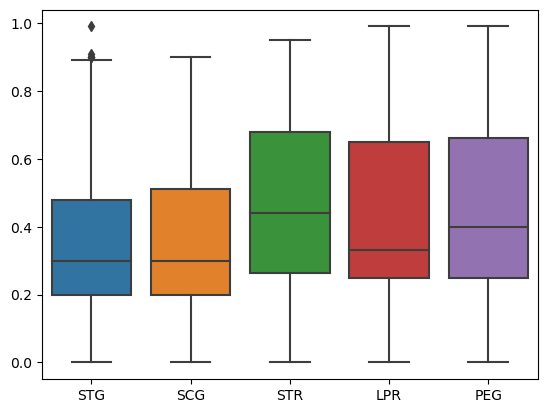

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a boxplot for each column using Seaborn
sns.boxplot(data=combined, orient='v')

Outliers: [0.9  0.99 0.91 0.9  0.9 ]
Number of outliers: 5


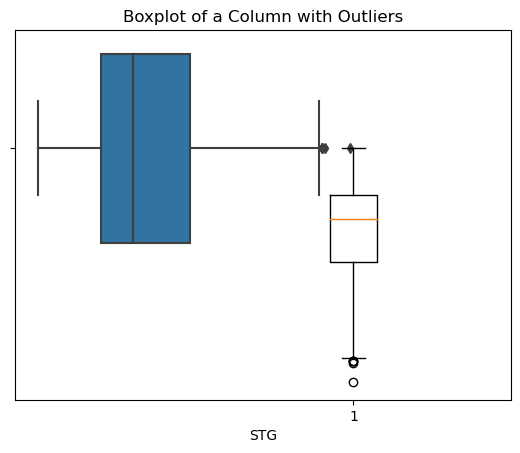

In [14]:
# create a boxplot for the column using Seaborn
sns.boxplot(x='STG', data=combined)

# add a title
plt.title('Boxplot of a Column with Outliers')

# extract the outliers and count them
outliers = plt.boxplot(combined['STG']).get('fliers')[0].get_data()[1]
num_outliers = len(outliers)

# print the outliers and its frequency 
print(f'Outliers: {outliers}')
print(f'Number of outliers: {num_outliers}')

In [15]:
#The values seems to be okay, anyways not an impossible value

#### Counting missing values in each column

In [16]:
# count the missing values in each column
missing_values = combined.isnull().sum()

# print the result
print(missing_values)

STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64


#### Checking for outliers

In [17]:
combined.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


#### Removing white spaces

In [18]:
#Since all columns are numerical, no whitespaces 

#### Change data type

In [19]:
combined['UNS'] = combined['UNS'].astype('category')
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   STG     403 non-null    float64 
 1   SCG     403 non-null    float64 
 2   STR     403 non-null    float64 
 3   LPR     403 non-null    float64 
 4   PEG     403 non-null    float64 
 5   UNS     403 non-null    category
dtypes: category(1), float64(5)
memory usage: 16.5 KB


## Task 2: Data Exploration

<AxesSubplot:xlabel='STG', ylabel='PEG'>

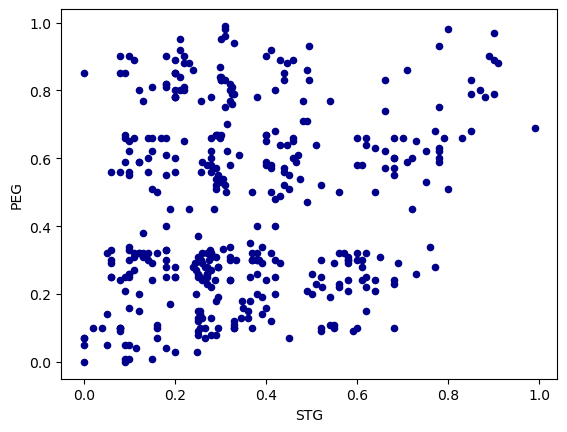

In [20]:
combined.plot.scatter(x='STG',
...                       y='PEG',
...                       c='DarkBlue')

<AxesSubplot:xlabel='SCG', ylabel='PEG'>

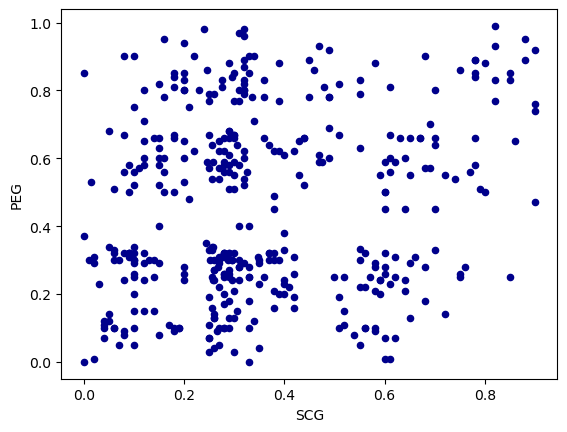

In [21]:
combined.plot.scatter(x='SCG',
...                       y='PEG',
...                       c='DarkBlue')

In [22]:
correlation = combined['SCG'].corr(combined['PEG'])
print(correlation)

0.1935655971927667


In [23]:
correlation = combined['STG'].corr(combined['PEG'])
print(correlation)

0.19862920156966532


In [24]:
correlation = combined['LPR'].corr(combined['PEG'])
print(correlation)

-0.03928304345341555


In [25]:
correlation = combined['STR'].corr(combined['LPR'])
print(correlation)

0.08342274664330605


In [26]:
correlation = combined['STG'].corr(combined['SCG'])
print(correlation)

0.0490226319159418


In [27]:
correlation = combined['STG'].corr(combined['LPR'])
print(correlation)

0.11395650524642892


In [28]:
correlation = combined['SCG'].corr(combined['LPR'])
print(correlation)

0.11971635834817942


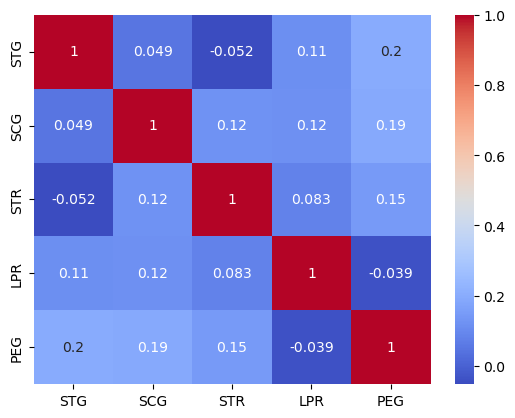

In [29]:
corr = combined.corr()

# Create the heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Text(0.5, 1.0, 'UNS')

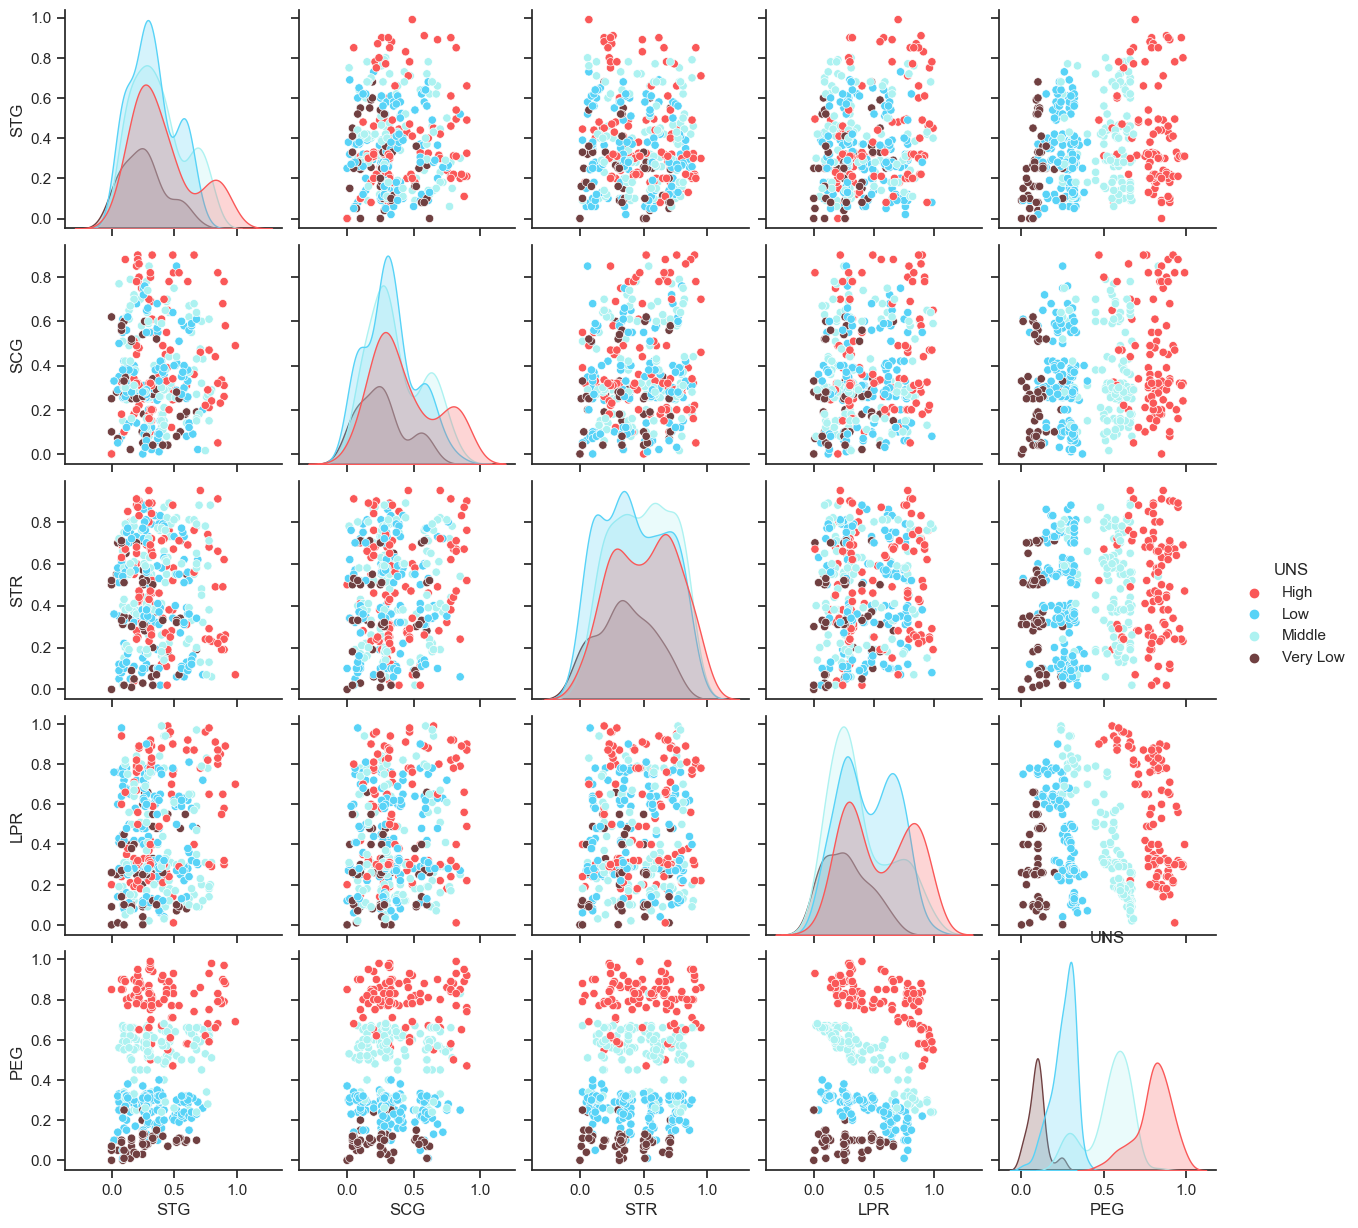

In [30]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7", "#adf2f1", "#704041"]

sns.pairplot(combined, hue="UNS", palette=pal)
plt.title("UNS")

In [31]:
combined.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   STG     403 non-null    float64 
 1   SCG     403 non-null    float64 
 2   STR     403 non-null    float64 
 3   LPR     403 non-null    float64 
 4   PEG     403 non-null    float64 
 5   UNS     403 non-null    category
dtypes: category(1), float64(5)
memory usage: 16.5 KB


### Regression Analysis 

In [33]:
import statsmodels.api as sm
# create a linear regression model
model = sm.OLS(combined['STG'], sm.add_constant(combined['PEG'])).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    STG   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     16.47
Date:                Wed, 24 May 2023   Prob (F-statistic):           5.94e-05
Time:                        15:50:42   Log-Likelihood:                 61.867
No. Observations:                 403   AIC:                            -119.7
Df Residuals:                     401   BIC:                            -111.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2811      0.021     13.676      0.0

In [34]:
model = sm.OLS(combined['SCG'], sm.add_constant(combined['PEG'])).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SCG   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     15.61
Date:                Wed, 24 May 2023   Prob (F-statistic):           9.20e-05
Time:                        15:50:42   Log-Likelihood:                 54.828
No. Observations:                 403   AIC:                            -105.7
Df Residuals:                     401   BIC:                            -97.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2846      0.021     13.605      0.0

In [35]:
model = sm.OLS(combined['STR'], sm.add_constant(combined['LPR'])).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    STR   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.810
Date:                Wed, 24 May 2023   Prob (F-statistic):             0.0944
Time:                        15:50:42   Log-Likelihood:                -5.8658
No. Observations:                 403   AIC:                             15.73
Df Residuals:                     401   BIC:                             23.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4232      0.024     17.678      0.0

In [36]:
model = sm.OLS(combined['LPR'], sm.add_constant(combined['PEG'])).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    LPR   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6198
Date:                Wed, 24 May 2023   Prob (F-statistic):              0.432
Time:                        15:50:42   Log-Likelihood:                -24.326
No. Observations:                 403   AIC:                             52.65
Df Residuals:                     401   BIC:                             60.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4486      0.025     17.624      0.0

In [37]:

# Define the independent and dependent variables
X = combined[['STG', 'SCG']]
y = combined['PEG']

# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    PEG   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     15.83
Date:                Wed, 24 May 2023   Prob (F-statistic):           2.43e-07
Time:                        15:50:42   Log-Likelihood:                -23.483
No. Observations:                 403   AIC:                             52.97
Df Residuals:                     400   BIC:                             64.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2909      0.032      9.069      0.0

### Non-parametric test

In [38]:
from scipy.stats import spearmanr
# Extract the two variables of interest
STG = combined['STG']
PEG = combined['PEG']

# Perform the Spearman rank correlation test
corr, pvalue = spearmanr(STG, PEG)

# Print the results
print('Spearman correlation coefficient:', corr)
print('p-value:', pvalue)


Spearman correlation coefficient: 0.1718850201850126
p-value: 0.0005288981997026867


#### A p-value less than 0.05 is typically considered statistically significant, which means that the observed correlation is unlikely to have occurred by chance.

### Task 2.1 - Exploring individual attributes

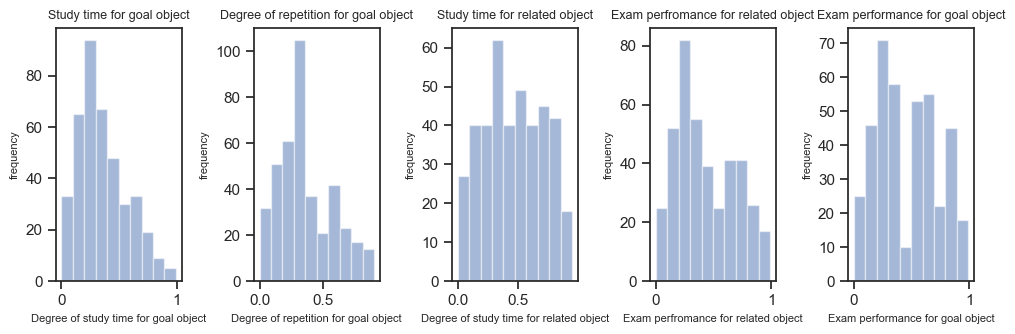

In [39]:
# Create subplots for each attribute's histogram
fig, axs = plt.subplots(1, 5, figsize=(10, 3.5))

# Plot histograms for each attribute
axs[0].hist(combined['STG'], bins=10, alpha=0.5)
axs[0].set_title('Study time for goal object',fontsize=9)
axs[0].set_xlabel('Degree of study time for goal object',fontsize=8)
axs[0].set_ylabel('frequency',fontsize=8)
axs[1].hist(combined['SCG'], bins=10, alpha=0.5)
axs[1].set_title('Degree of repetition for goal object',fontsize=9)
axs[1].set_xlabel('Degree of repetition for goal object',fontsize=8)
axs[1].set_ylabel('frequency',fontsize=8)
axs[2].hist(combined['STR'], bins=10, alpha=0.5)
axs[2].set_title('Study time for related object',fontsize=9)
axs[2].set_xlabel('Degree of study time for related object',fontsize=8)
axs[2].set_ylabel('frequency',fontsize=8)
axs[3].hist(combined['LPR'], bins=10, alpha=0.5)
axs[3].set_title('Exam perfromance for related object',fontsize=9)
axs[3].set_xlabel('Exam perfromance for related object',fontsize=8)
axs[3].set_ylabel('frequency',fontsize=8)
axs[4].hist(combined['PEG'], bins=10, alpha=0.5)
axs[4].set_title('Exam performance for goal object',fontsize=9)
axs[4].set_xlabel('Exam performance for goal object',fontsize=8)
axs[4].set_ylabel('frequency',fontsize=8)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

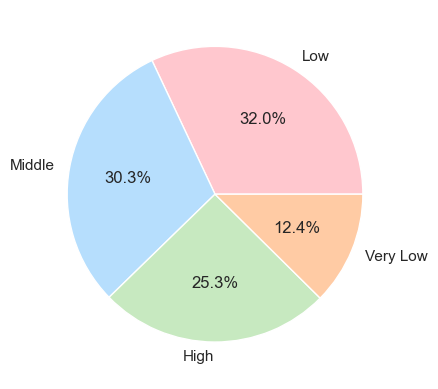

In [76]:
colors=['#FFC7CE', '#B6DEFD', '#C7E9C0', '#FFCBA4','#006400']
ax=combined['UNS'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=colors)
ax.set(ylabel=None)
plt.show()

### Task:2.2 - Graphs with the dependent variable - UNS(Knowledge level)

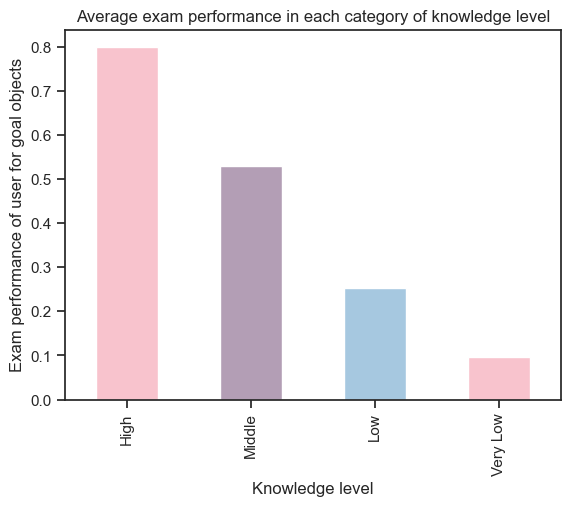

In [41]:
# Calculate the average value for each category
average_values = combined.groupby('UNS')['PEG'].mean()

# Sort the average values in ascending order
average_values = average_values.sort_values(ascending=False)

# Define custom colors
colors = [ '#F8C3CD','#B39EB5','#A6C8E0']

# Create a bar plot
average_values.plot(kind='bar',color=colors)

# Add labels and title
plt.xlabel('Knowledge level')
plt.ylabel('Exam performance of user for goal objects')
plt.title('Average exam performance in each category of knowledge level')

# Display the plot
plt.show()

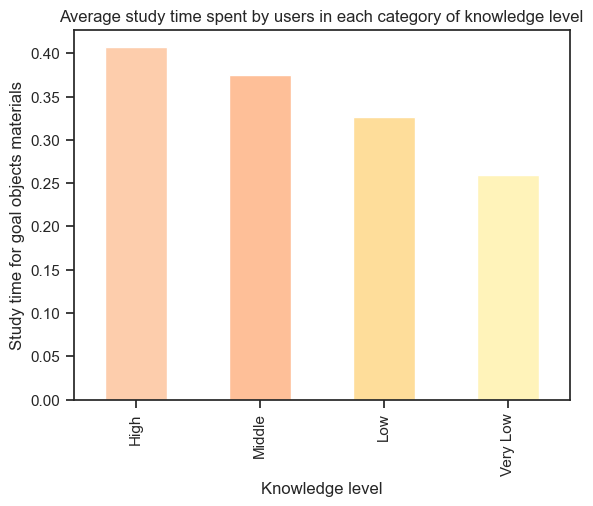

In [42]:
# Calculate the average value for each category
average_values = combined.groupby('UNS')['STG'].mean()

# Sort the average values in ascending order
average_values = average_values.sort_values(ascending=False)

# Define custom colors
pastel_colors = ['#FDCDAC', '#FEBF98', '#FEDD9A', '#FFF3BA', '#BEE3DB']

# Create a bar plot
average_values.plot(kind='bar',color=pastel_colors)

# Add labels and title
plt.xlabel('Knowledge level')
plt.ylabel('Study time for goal objects materials')
plt.title('Average study time spent by users in each category of knowledge level')

# Display the plot
plt.show()

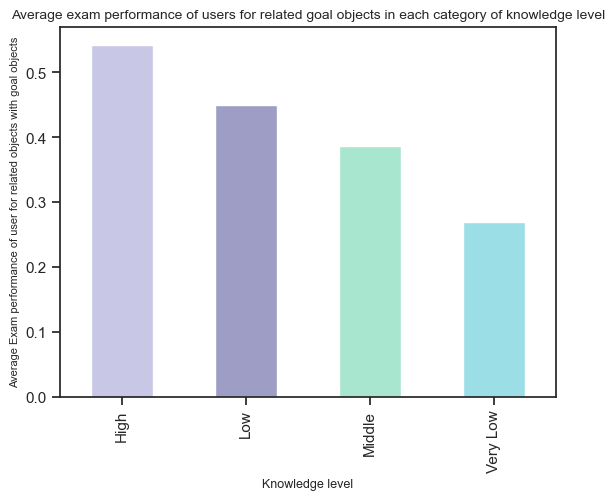

In [43]:
# Calculate the average value for each category
average_values = combined.groupby('UNS')['LPR'].mean()

# Sort the average values in ascending order
average_values = average_values.sort_values(ascending=False)

# Define custom colors
pastel_colors = ['#C8C8E6', '#9D9DC6', '#A8E6CF', '#9CDEE6', '#E6C8C8']

# Create a bar plot
average_values.plot(kind='bar',color=pastel_colors)

# Add labels and title
plt.xlabel('Knowledge level',fontsize=9)
plt.ylabel('Average Exam performance of user for related objects with goal objects',fontsize=8)
plt.title('Average exam performance of users for related goal objects in each category of knowledge level',fontsize=10)

# Display the plot
plt.show()

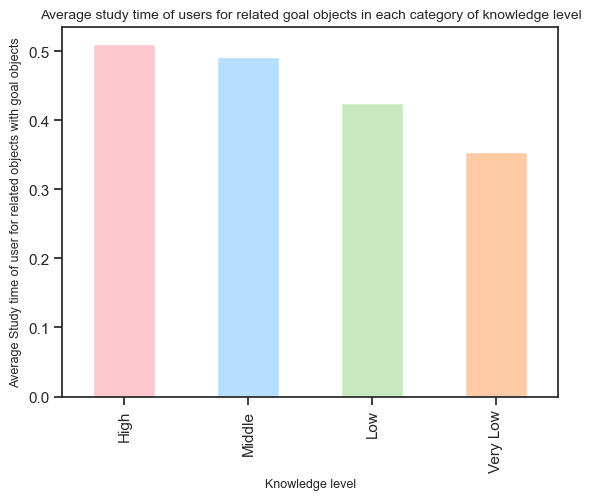

In [44]:
# Calculate the average value for each category
average_values = combined.groupby('UNS')['STR'].mean()

# Sort the average values in ascending order
average_values = average_values.sort_values(ascending=False)

# Define custom colors
pastel_colors =  ['#FFC7CE', '#B6DEFD', '#C7E9C0', '#FFCBA4', '#FFD700']

# Create a bar plot
average_values.plot(kind='bar',color=pastel_colors)

# Add labels and title
plt.xlabel('Knowledge level',fontsize=9)
plt.ylabel('Average Study time of user for related objects with goal objects',fontsize=9)
plt.title('Average study time of users for related goal objects in each category of knowledge level',fontsize=10)

# Display the plot
plt.show()

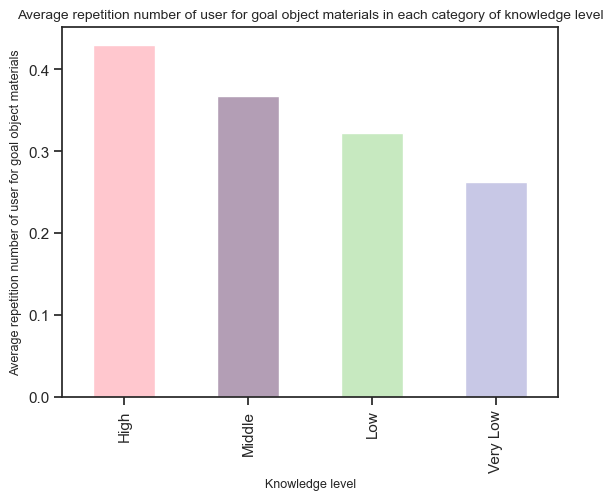

In [45]:
# Calculate the average value for each category
average_values = combined.groupby('UNS')['SCG'].mean()

# Sort the average values in ascending order
average_values = average_values.sort_values(ascending=False)

# Define custom colors
pastel_colors =  ['#FFC7CE', '#B39EB5', '#C7E9C0','#C8C8E6']

# Create a bar plot
average_values.plot(kind='bar',color=pastel_colors)

# Add labels and title
plt.xlabel('Knowledge level',fontsize=9)
plt.ylabel('Average repetition number of user for goal object materials',fontsize=9)
plt.title('Average repetition number of user for goal object materials in each category of knowledge level',fontsize=10)

# Display the plot
plt.show()

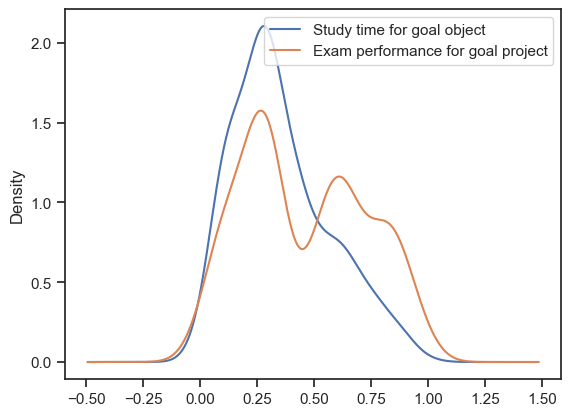

In [46]:
combined['STG'].plot(kind='kde')
combined['PEG'].plot(kind='kde')
plt.legend(["Study time for goal object", "Exam performance for goal project"])

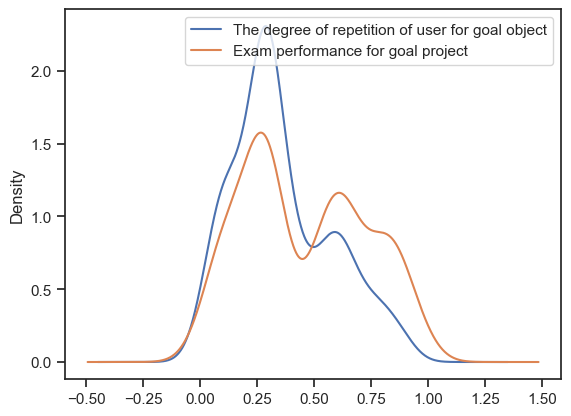

In [47]:
combined['SCG'].plot(kind='kde')
combined['PEG'].plot(kind='kde')
plt.legend(["The degree of repetition of user for goal object", "Exam performance for goal project"])

## Decision Tree Classifier

In [48]:
#splitting the dataset back to train and test
train=combined[:258]
test=combined[258:]

In [49]:
train.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [50]:
test = test.reset_index(drop=True)

In [51]:
test.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [52]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_text
from sklearn.metrics import classification_report

#split dataset in features and target variable
feature_cols = ['STG', 'SCG', 'STR', 'LPR','PEG']
label = ['UNS']

X_train = train[feature_cols]
y_train = train[label]

X_test = test[feature_cols]
y_test = test[label]

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [54]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.896551724137931


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.97      0.90      0.93        39
         Low       0.89      0.89      0.89        46
      Middle       0.82      0.91      0.86        34
    Very Low       0.92      0.88      0.90        26

    accuracy                           0.90       145
   macro avg       0.90      0.90      0.90       145
weighted avg       0.90      0.90      0.90       145



In [57]:
# Print the decision tree code
tree_rules = export_text(clf, feature_names=['STG', 'SCG', 'STR', 'LPR','PEG'])
print(tree_rules)

|--- PEG <= 0.38
|   |--- PEG <= 0.13
|   |   |--- LPR <= 0.62
|   |   |   |--- class: Very Low
|   |   |--- LPR >  0.62
|   |   |   |--- PEG <= 0.09
|   |   |   |   |--- STG <= 0.18
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- STG >  0.18
|   |   |   |   |   |--- class: Very Low
|   |   |   |--- PEG >  0.09
|   |   |   |   |--- class: Low
|   |--- PEG >  0.13
|   |   |--- LPR <= 0.61
|   |   |   |--- PEG <= 0.24
|   |   |   |   |--- SCG <= 0.26
|   |   |   |   |   |--- class: Very Low
|   |   |   |   |--- SCG >  0.26
|   |   |   |   |   |--- class: Low
|   |   |   |--- PEG >  0.24
|   |   |   |   |--- class: Low
|   |   |--- LPR >  0.61
|   |   |   |--- PEG <= 0.24
|   |   |   |   |--- class: Low
|   |   |   |--- PEG >  0.24
|   |   |   |   |--- STR <= 0.36
|   |   |   |   |   |--- LPR <= 0.67
|   |   |   |   |   |   |--- class: Middle
|   |   |   |   |   |--- LPR >  0.67
|   |   |   |   |   |   |--- PEG <= 0.30
|   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |

In [58]:
# Now draw the tree we created using graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf, 'usersAll.dot', feature_names = feature_cols)

### Decision tree classifier with K-fold cross validation

#### Criterion - gini

In [59]:
feature_cols = ['STG', 'SCG', 'STR', 'LPR','PEG']
label = ['UNS']

In [60]:
X = combined[feature_cols]
y = combined[label]

In [61]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [62]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

In [63]:
#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(X)):
 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.93827
[fold 1] score: 0.92593
[fold 2] score: 0.91358
[fold 3] score: 0.91250
[fold 4] score: 0.90000


#### Criterion - entropy

In [64]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

In [65]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

[fold 0] score: 0.91358
[fold 1] score: 0.90123
[fold 2] score: 0.87654
[fold 3] score: 0.86250
[fold 4] score: 0.93750
Highest Accuracy: 0.93750
Confusion matrix for Highest Accuracy:
 [[18  0  1  0]
 [ 0 24  1  2]
 [ 1  0 23  0]
 [ 0  0  0 10]]


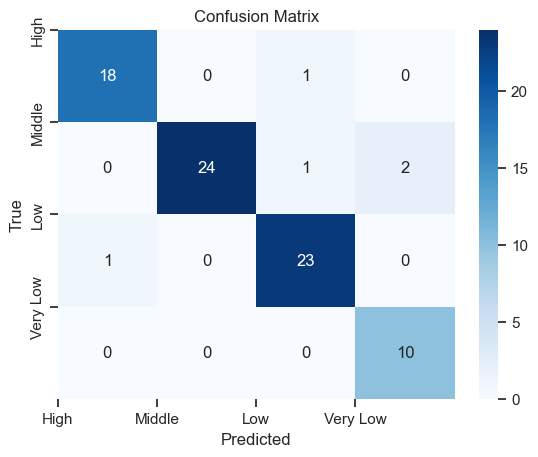

In [66]:
#run the KFlod cross validation
from sklearn.metrics import confusion_matrix
highest_accuracy = 0.0
for k, (train_index, test_index) in enumerate(kf.split(X)):
 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    accuracy = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, clf.predict(X_test))
    

    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_confusion_matrix = cm

print("Highest Accuracy: {:.5f}".format(highest_accuracy))
print("Confusion matrix for Highest Accuracy:\n", best_confusion_matrix)
# Define class labels
class_labels = ['High', 'Middle', 'Low', 'Very Low']

# Create a heatmap of the confusion matrix
sns.heatmap(best_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)

# Show the plot
plt.show()

In [67]:
# Now draw the tree we created using graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf, 'usersAll.dot', feature_names = feature_cols)

## K Nearest Neighbours

In [68]:
X_train = train[feature_cols]
y_train = train[label]

X_test = test[feature_cols]
y_test = test[label]

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt

X_train, X_test, y_train, y_test = train_test_split(combined[feature_cols], combined[label], test_size=0.25, random_state=0)
clf = KNeighborsClassifier(4)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)

print(cm)

print(clf.score(X_test, y_test))



[[23  0  1  0]
 [ 0 31  1  0]
 [ 3  2 27  0]
 [ 0  9  0  4]]
0.8415841584158416


C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

In [70]:
X = combined[feature_cols]
y = combined[label]
X = X.values
y = y.values

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt

from sklearn.utils import shuffle

col_num = X_train.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    print(new_Ind)
    newData = X[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.25, random_state=0)
    clf = KNeighborsClassifier(5)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

[2]
Score with 1 selected features: 0.4158415841584158
[2, 1]
Score with 2 selected features: 0.45544554455445546
[2, 1, 4]
Score with 3 selected features: 0.8118811881188119
[2, 1, 4, 0]
Score with 4 selected features: 0.8316831683168316
[2, 1, 4, 0, 3]
Score with 5 selected features: 0.8712871287128713


C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

### KNN with K-Fold

In [72]:
#define classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(4)

In [73]:
X = combined[feature_cols]
y = combined[label]

In [74]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ANJANA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

[fold 0] score: 0.91358
[fold 1] score: 0.81481
[fold 2] score: 0.83951
[fold 3] score: 0.82500
[fold 4] score: 0.87500
Highest Accuracy: 0.91358
Confusion matrix for Highest Accuracy:
 [[22  0  0  0]
 [ 0 31  0  0]
 [ 1  3 17  0]
 [ 0  3  0  4]]


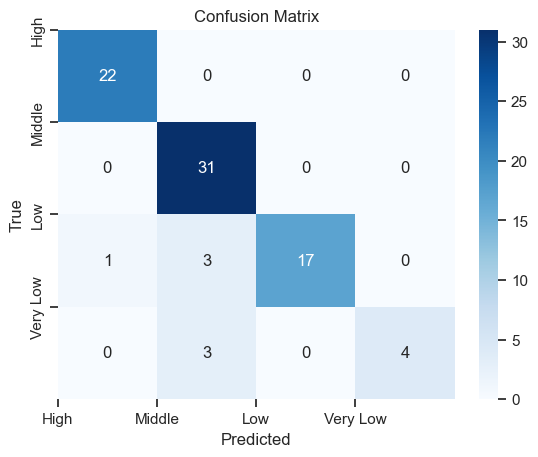

In [75]:
#run the KFlod cross validation
highest_accuracy = 0.0
for k, (train_index, test_index) in enumerate(kf.split(X)):
 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    accuracy = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, clf.predict(X_test))

    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_confusion_matrix = cm

print("Highest Accuracy: {:.5f}".format(highest_accuracy))
print("Confusion matrix for Highest Accuracy:\n", best_confusion_matrix)
# Define class labels
class_labels = ['High', 'Middle', 'Low', 'Very Low']

# Create a heatmap of the confusion matrix
sns.heatmap(best_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)

# Show the plot
plt.show()